In [14]:
import pandas as pd
from tabulate import tabulate


shapeshifter_weights_summary_file = '/content/drive/MyDrive/CSCE_614/Project/shapeshifter_outputs/shapeshifter_encoded_summary_weights.csv'
shapeshifter_act_summary_file = '/content/drive/MyDrive/CSCE_614/Project/shapeshifter_outputs/shapeshifter_encoded_summary_activations.csv'


atalanta_weights_summary_file = '/content/drive/MyDrive/CSCE_614/Project/atalanta_outputs/atalanta_encoded_summary_weights.csv'
atalanta_act_summary_file = '/content/drive/MyDrive/CSCE_614/Project/atalanta_outputs/atalanta_encoded_summary_activations.csv'


file_dict = {'atalanta_weights': atalanta_weights_summary_file,
             'atalanta_activations': atalanta_act_summary_file,
             'shapeshifter_weights': shapeshifter_weights_summary_file,
             'shapeshifter_activations': shapeshifter_act_summary_file}
results_list = []
for model, file_path in file_dict.items():
    # Load the dataset
    data = pd.read_csv(file_path)



    # Group by 'Model_Name' and calculate total original bits, compressed bits, and new compression ratio
    results = data.groupby('Model_Name').agg(
        Total_Original_Bits=('Original (bits)', 'sum'),
        Total_Compressed_Bits=('After Compression (bits)', 'sum')
    )
    results['New_Compression_Ratio'] = results['Total_Compressed_Bits'] / results['Total_Original_Bits']
    model_name, vtype = model.split('_')
    row = {'Encoder': model_name, 'Type': vtype, 'Compressed_bits': results['Total_Compressed_Bits']}
    results_list.append(row)

    # Generate a table
    print("-----------------------------------------------------------------")
    print(f"Model: {model_name} Type: {vtype}")
    print("-----------------------------------------------------------------")
    print(tabulate(results.reset_index(), headers='keys', tablefmt='pretty'))

import csv

# Specify the output CSV file
output_file = 'compression_data.csv'

# Write the data to the CSV file
with open(output_file, mode='w', newline='') as csvfile:
    # Create a writer object
    writer = csv.DictWriter(csvfile, fieldnames=results_list[0].keys())

    # Write the header (keys from the dictionary)
    writer.writeheader()

    # Write the rows
    writer.writerows(results_list)

print(f"CSV file '{output_file}' created successfully.")



-----------------------------------------------------------------
Model: atalanta Type: weights
-----------------------------------------------------------------
+---+--------------+---------------------+-----------------------+-----------------------+
|   |  Model_Name  | Total_Original_Bits | Total_Compressed_Bits | New_Compression_Ratio |
+---+--------------+---------------------+-----------------------+-----------------------+
| 0 |  GoogLeNet   |      44682752       |       38054547        |  0.8516607705810063   |
| 1 | Mobilenet_v2 |      17518080       |       14095745        |  0.8046398349590823   |
| 2 |   Resnet50   |      187639296      |       155610150       |  0.8293046995870204   |
+---+--------------+---------------------+-----------------------+-----------------------+
-----------------------------------------------------------------
Model: atalanta Type: activations
-----------------------------------------------------------------
+---+--------------+---------------

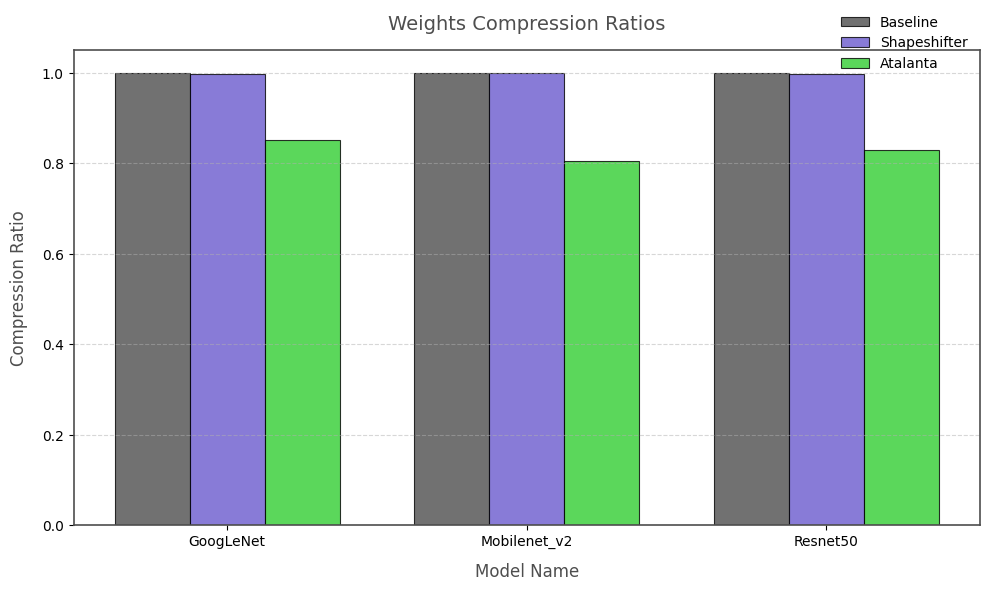

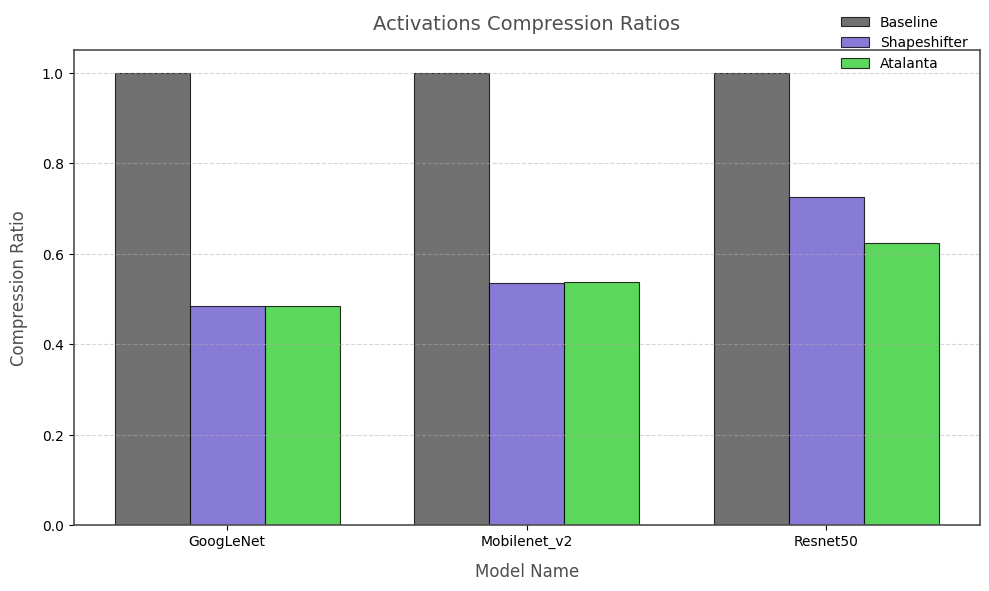

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
models = ["GoogLeNet", "Mobilenet_v2", "Resnet50"]
baseline = [1, 1, 1]

# Compression Ratios
atalanta_weights = [0.8516607705810063, 0.8046398349590823, 0.8293046995870204]
shapeshifter_weights = [0.9969058306883157, 0.9998310317112378, 0.998383877969783]

atalanta_activations = [0.4841569931435515, 0.5375331736724391, 0.6248483655815952]
shapeshifter_activations = [0.48419904778436285, 0.5344589009588339, 0.7249890588289492]

# Colors
colors = {
    "baseline": "#4E4E4E",  # Dark Gray
    "shapeshifter": "#6A5ACD",  # Medium Slate Blue
    "atalanta": "#32CD32",  # Lime Green
}

# Save tables to CSV files
weights_data = {
    "Model_Name": models,
    "Baseline": baseline,
    "Atalanta_Weights": atalanta_weights,
    "Shapeshifter_Weights": shapeshifter_weights
}
activations_data = {
    "Model_Name": models,
    "Baseline": baseline,
    "Atalanta_Activations": atalanta_activations,
    "Shapeshifter_Activations": shapeshifter_activations
}

# Convert to DataFrame and save
weights_df = pd.DataFrame(weights_data)
activations_df = pd.DataFrame(activations_data)

weights_df.to_csv("weights_compression.csv", index=False)
activations_df.to_csv("activations_compression.csv", index=False)

# Set global style
plt.style.use("seaborn-v0_8-muted")  # Use a clean modern style
plt.rcParams.update({
    "font.family": "sans-serif",
    "axes.edgecolor": "#4E4E4E",
    "axes.linewidth": 1.2,
    "grid.alpha": 0.5,
    "grid.linestyle": "--",
})

# Plotting function
def plot_grouped_bar_chart(title, y_data, labels, file_name):
    x = np.arange(len(models))  # X-axis positions
    bar_width = 0.25  # Width of bars

    plt.figure(figsize=(10, 6))
    plt.bar(x - bar_width, baseline, width=bar_width, label="Baseline", color=colors["baseline"], alpha=0.8, edgecolor="black", linewidth=0.8)
    plt.bar(x, y_data["shapeshifter"], width=bar_width, label="Shapeshifter", color=colors["shapeshifter"], alpha=0.8, edgecolor="black", linewidth=0.8)
    plt.bar(x + bar_width, y_data["atalanta"], width=bar_width, label="Atalanta", color=colors["atalanta"], alpha=0.8, edgecolor="black", linewidth=0.8)

    plt.xticks(x, labels)
    plt.xlabel("Model Name", labelpad=10, fontsize=12, color="#4E4E4E")
    plt.ylabel("Compression Ratio", labelpad=10, fontsize=12, color="#4E4E4E")
    plt.title(title, pad=15, fontsize=14, color="#4E4E4E")
    plt.grid(axis="y")
    plt.legend(loc="upper right", bbox_to_anchor=(1, 1.1), frameon=False, fontsize=10)  # Adjust legend position
    plt.tight_layout()
    plt.savefig(file_name, dpi=300)
    plt.show()

# Plot grouped bar charts
plot_grouped_bar_chart(
    title="Weights Compression Ratios",
    y_data={
        "shapeshifter": shapeshifter_weights,
        "atalanta": atalanta_weights
    },
    labels=models,
    file_name="modern_weights_compression_chart.png"
)

plot_grouped_bar_chart(
    title="Activations Compression Ratios",
    y_data={
        "shapeshifter": shapeshifter_activations,
        "atalanta": atalanta_activations
    },
    labels=models,
    file_name="modern_activations_compression_chart.png"
)


In [ ]:
\documentclass{article}
\usepackage{booktabs}

\begin{document}

\begin{table}[h!]
\centering
\begin{tabular}{|l|l|l|l|l|l|l|}
\hline
\textbf{Network}      & \textbf{Dataset} & \textbf{Application}  & \textbf{Data Type} & \textbf{Quantizer} & \textbf{Weights Compression} & \textbf{Activations Compression} \\ \hline
GoogLeNet    & ImageNet & Classification & int8      & Torchvision & 0.1453                & 0.0001                   \\ \hline
Mobilenet\_v2 & ImageNet & Classification & int8      & Torchvision & 0.1960                & 0.0057                   \\ \hline
Resnet50     & ImageNet & Classification & int8      & Torchvision & 0.1699                & 0.1385                   \\ \hline
\end{tabular}
\caption{Compression Ratios for Weights and Activations}
\label{tab:compression}
\end{table}

\end{document}
